Kevin Andrés Restrepo Tobón
CC 1000630129

###I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

In [63]:
import numpy as np
from scipy import integrate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pylab as plt

En puntos dentro del intervalo como $\alpha = 0$ el integrando tiene extremadamente mal comportamiento:
$$
\frac{\sqrt{2} d \theta}{(\cos \theta-\cos (0))^{\frac{1}{2}}}
= \frac{d \theta}{\frac{(\cos \theta-1)^{\frac{1}{2}}}{\sqrt{2}}}
$$
$$
=\frac{d \theta}{\sqrt{\frac{(\cos \theta-1)}{2}}}
$$
Esta expresión tiene problemas para $\theta = 0 $ y para todo $\cos(\theta)<1$, por lo que la evaluación de la integral fallará siempre.




In [109]:

I = lambda α: integrate.quad(lambda ϕ:1/np.sqrt(1-np.sin(α/2)**2*np.sin(ϕ)**2),0,np.pi/2)[0]
def Si(t):
    try:
        nn=np.array(t).shape[0]
        f=np.vectorize(I)
    except IndexError:
        f=I
    return f(t)*2/np.pi
x_ = np.linspace(0,np.pi/2,100)
Si(x_)

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

In [111]:
df = pd.DataFrame({'α [rad]':x_,'α [°]':x_*180/np.pi,'T/T0':Si(x_)})
df

,α [rad],α [°],T/T0
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


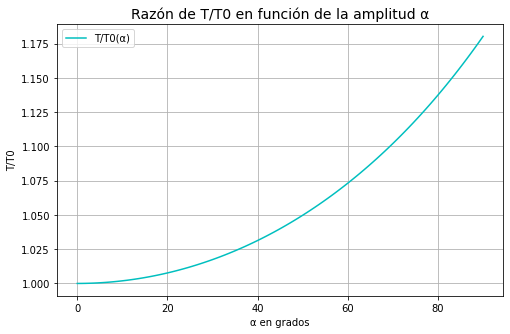

In [112]:
plt.figure(figsize = (8,5))
plt.plot(df['α [°]'],df['T/T0'],'c',label = 'T/T0(α)')
plt.title('Razón de T/T0 en función de la amplitud α',size=14)
plt.ylabel('T/T0')
plt.xlabel('α en grados')
plt.grid()
plt.legend()
plt.show()

Cuando $\alpha \longrightarrow 0$, i.e: la amplitud es cada vez más pequeña y por lo tanto el periodo se aproxima al periodo del pendulo a amplitudes pequeñas
$$T\longrightarrow T_0$$
De modo que
$$
\frac{T}{T_0} = 1
$$

II)
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$


2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [115]:
import random

def orthogonal(θ):
    return np.array( [[np.cos(θ) ,np.sin(θ)],
                      [-np.sin(θ),np.cos(θ)]]   )

In [118]:
random.seed(1000639128)
θ = random.uniform(0,2*np.pi)

In [122]:
R = orthogonal(θ)
U = orthogonal(np.pi/4)
D = np.diag([2,4]) #matriz diagonal
Y = np.dot(R@np.sqrt(D),U.transpose())
Y


array([[ 0.54988746,  1.7318073 ],
       [-1.64244445, -0.02904261]])

La matriz A

In [124]:
A = Y.transpose()@Y
A

array([[3., 1.],
       [1., 3.]])

In [147]:
print('Eigenvalues:\n{}\nEigenvectors:\n{}'.format(np.dot(U.transpose()@A,U).round(15).astype(int),U))

Eigenvalues:
[[2 0]
 [0 4]]
Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [148]:
λ,V =np.linalg.eig(A)
print('Eigenvalues:\n{}\nEigenvectors:\n{}'.format(np.diag(λ),np.c_[ -V[:,1],-V[:,0]  ]
))


Eigenvalues:
[[2. 0.]
 [0. 4.]]
Eigenvectors:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
